In [1]:
# run this cell to clean up the variables 

#   %reset

In [4]:
import geopandas as gpd
from shapely.geometry import Polygon
import folium
from os.path import basename, splitext
import pandas as pd
from pyprojroot import here
import glob
import os
from pandas import DataFrame
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [5]:
here

<function pyprojroot.pyprojroot.here(relative_project_path='.', project_files=('.git', '.here', '*.Rproj', 'requirements.txt', 'setup.py', '.dvc', '.spyproject', 'pyproject.toml', '.idea', '.vscode'), warn=True) -> pathlib.Path>

In [6]:
#use pyprojroot for path with there here function, I can access my data all from the project root. This means if I move the notebook to another folder or subfolder I don't have to change the path to my data. Only if I move the data to another folder would I need to change the path in my notebook (or script)
file_path_metadata = here('./data/raw/ground_measures_metadata.csv')
file_path_train = here('./data/raw/ground_measures_train_features.csv')
file_path_test = here('./data/raw/ground_measures_test_features.csv')
file_path_train_labels = here('./data/raw/train_labels.csv')

In [7]:
file_path_train_labels

PosixPath('/Users/nicoleta/Desktop/code/Compare_SWE/data/raw/train_labels.csv')

In [9]:
import rasterio
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature  
from matplotlib import pyplot
#import rasterstats
import regionmask
import xarray as xr
#import xesmf as xe
import numpy as np
import dask.array as da
#import xoak

In [10]:
#load metadata 
df_snotel_labels = pd.read_csv(file_path_train_labels)
df_snotel_labels

,cell_id,2013-01-01,2013-01-08,2013-01-15,2013-01-22,2013-01-29,2013-02-05,2013-02-12,2013-02-19,2013-02-26,...,2019-06-13,2019-06-14,2019-06-18,2019-06-24,2019-06-25,2019-12-03,2019-12-10,2019-12-17,2019-12-24,2019-12-31
0,0003f387-71c4-48f6-b2b0-d853bd4f0aba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000617d8-8c14-43e2-b708-7e3a69fe3cc3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000ba8d9-d6d5-48da-84a2-1fa54951fae1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0017d1c4-64cb-426d-9158-3f6521d2dd22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0020c632-3d5c-4509-b4ee-6b63a89bf2ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10873,ffdc53d2-5565-496a-b849-4fcf33f33a36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10874,ffdfb5a4-91a0-41a9-a4d5-501b04ef6326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10875,ffe43514-2c92-43b6-bd84-d183806aca65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10876,fff95195-ccc9-40b7-b302-a0d8570c86bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_snotel_labels.set_index("cell_id", inplace=True)


In [12]:
df_train_labels = df_snotel_labels
one_station = df_train_labels.loc['0b9543d3-3cf9-4f28-b8eb-fd22c1956153']

<AxesSubplot: >

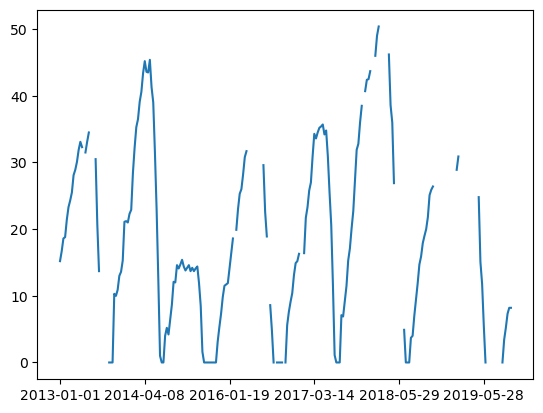

In [13]:
one_station.plot()

In [14]:
#load metadata 
df_snotel_ml = pd.read_csv(file_path_metadata)
#df_snotel_ml

In [15]:
#load train
df_snotel_train = pd.read_csv(file_path_train)
#df_snotel_train

In [16]:
#load test
df_snotel_test = pd.read_csv(file_path_test)
#df_snotel_test

,cell_id,region,geometry
0,0003f387-71c4-48f6-b2b0-d853bd4f0aba,sierras,"POLYGON ((-118.71895 37.07419, -118.71895 37.0..."
1,000617d8-8c14-43e2-b708-7e3a69fe3cc3,central rockies,"POLYGON ((-107.07679 37.78042, -107.07679 37.7..."
2,000863e7-21e6-477d-b799-f5675c348627,other,"POLYGON ((-119.40167 37.02400, -119.40167 37.0..."
3,000ba8d9-d6d5-48da-84a2-1fa54951fae1,sierras,"POLYGON ((-119.32082 37.43171, -119.32082 37.4..."
4,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,sierras,"POLYGON ((-118.52132 36.65735, -118.52132 36.6..."
...,...,...,...
18125,ffdfb5a4-91a0-41a9-a4d5-501b04ef6326,sierras,"POLYGON ((-118.62014 37.11718, -118.62014 37.1..."
18126,ffe43514-2c92-43b6-bd84-d183806aca65,other,"POLYGON ((-123.49799 47.90132, -123.49799 47.9..."
18127,ffeabc13-7c6f-4b63-b043-19c8f15e0345,sierras,"POLYGON ((-119.64422 37.87976, -119.64422 37.8..."
18128,fff95195-ccc9-40b7-b302-a0d8570c86bc,other,"POLYGON ((-123.37223 47.73242, -123.37223 47.7..."


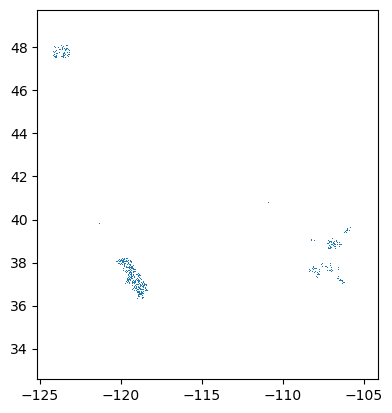

In [17]:
df_grid = gpd.read_file(here('./data/raw/grid_cells.geojson'))
df_grid['geometry']
df_grid.plot()
df_grid

In [18]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles='CartoDB positron')
for _, r in df_grid.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
   # folium.Popup(r['BoroName']).add_to(geo_j)
    geo_j.add_to(m)
#m

In [19]:
n = folium.Map(
    location = [40.715, -108.565],
    zoom_start = 12,
    tiles = 'Stamen Terrain'
)

#folium.GeoJson(osse_poly).add_to(m)
#folium.LatLngPopup().add_to(n)
tooltip = 'Click me!'
#n.choropleth(geo_path="/Users/carina/Desktop/code/SEUP/grid_cells.geojson")
#n.choropleth(geo_path='/Users/carina/Desktop/code/SEUP/grid_cells.geojson', topojson="objects.nyct2010")

df_snotel_ml.apply(lambda row:folium.CircleMarker(location=[row["latitude"], 
                                                  row["longitude"]]).add_to(n),
     axis=1)

from folium.features import DivIcon
#n

In [21]:
import geojson


In [23]:
#extract UA data at points
path_ua = '/Users/carina/Desktop/data/seup/UA_SWE/'
files_ua = path_ua + '4km_SWE_Depth*.nc'
ds_ua = xr.open_mfdataset(files_ua)

OSError: no files to open

In [18]:
#import os
#ROOT_DIR = os.path.realpath(os.path.join(os.path.dirname(__file__), '..'))

In [19]:
#extract SNODAS data at points 
path_snodas = '/Users/carina/Desktop/data/seup/SNODAS_SWE_year/'
ds_SNODAS = xr.open_mfdataset(path_snodas +'*.nc')


OSError: no files to open

In [20]:
centroids = np.vstack(df_grid.geometry.centroid).T
lon_grid = centroids[0:1].ravel().tolist()
lat_grid = centroids[1:2].ravel().tolist()


NameError: name 'df_grid' is not defined

In [21]:
grid_labels = df_grid['cell_id'].to_numpy()

NameError: name 'df_grid' is not defined

In [22]:
grid_labels = grid_labels.ravel().tolist()

NameError: name 'grid_labels' is not defined

In [23]:
dataUA_grid  = ds_ua.sel(lon = lon_grid, lat = lat_grid, method='nearest')
dataSNODAS_grid = ds_SNODAS.sel(lon = lon_grid, lat = lat_grid, method='nearest')
#ts_dataframe = data[vars].to_dataframe()

NameError: name 'ds_ua' is not defined

In [24]:
dataUA_grid

NameError: name 'dataUA_grid' is not defined

In [25]:
dataUA_grid_label = dataUA_grid.assign_coords(label = grid_labels) 
dataSNODAS_grid_label = dataSNODAS_grid.assign_coords(label = grid_labels) 

NameError: name 'dataUA_grid' is not defined

In [26]:
#one_point = dataUA_grid_label.sel(lat = 37.083332, lon = -118.708336,  method='nearest')
#one_point.SWE.plot()
#one_point

In [27]:
SWE_UA = ds_ua.SWE.sel(time = '2016-02-02')
im = SWE_UA.plot()

NameError: name 'ds_ua' is not defined

In [28]:
#df_ua = pd.DataFrame(columns = ['date', 'SWE_UA', 'snowdepth_UA' 'cell_id', 'latitude', 'longitude'])

<xarray.Dataset>
Dimensions:   (lat: 18130, lon: 18130, time: 1826, time_str_len: 11)
Coordinates:
  * lat       (lat) float32 37.083332 37.791668 37.041668 37.416668 ...
  * lon       (lon) float32 -118.708336 -107.083336 -119.416664 -119.333336 ...
  * time      (time) datetime64[ns] 2012-10-01 2012-10-02 2012-10-03 ...
Dimensions without coordinates: time_str_len
Data variables:
    crs       (time) |S1 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' ...
    time_str  (time_str_len, time) |S1 dask.array<shape=(11, 1826), chunksize=(11, 365)>
    SWE       (time, lat, lon) float32 dask.array<shape=(1826, 18130, 18130), chunksize=(365, 18130, 18130)>
    DEPTH     (time, lat, lon) float32 dask.array<shape=(1826, 18130, 18130), chunksize=(365, 18130, 18130)>

In [31]:
#import json
#import geojson
#gridcells = geojson.load(open('/Users/carina/Desktop/code/SEUP/grid_cells.geojson'))

In [167]:

#file_NAME_UA = './SWE_UA_GRID.nc'
#print ('saving to ', file_NAME_UA)

#dataUA_grid.load().to_netcdf(path = file_NAME_UA)
#print ('finished saving')


In [ ]:
#ncdat.load().to_netcdf('test_faster.nc')

In [ ]:

#file_NAME_UA = './SWE_UA_GRID.nc'
#print ('saving to ', file_NAME_UA)

#dataUA_grid.to_netcdf(path = file_NAME_UA)
#print ('finished saving')

In [5]:
#test_ua = xr.open_dataset('/Users/carina/Desktop/code/SEUP/SWE_UA_GRID_.nc')

In [23]:
#dataUA_grid_point  = dataUA_grid.sel(lon = -118.708336, lat = 37.083332)
#dataUA_grid_point['SWE'].plot()
#test_ua['SWE'][:,1000,1000].plot()

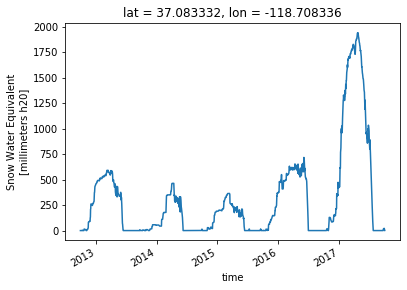

In [83]:
dataUA_point  = ds_ua.sel(lon = -118.708336, lat = 37.083332, method='nearest')
dataUA_point['SWE'].plot()
#test_ua['SWE'][:,1000,1000].plot()


In [173]:
dataUA_point

<xarray.Dataset>
Dimensions:   (time: 1826, time_str_len: 11)
Coordinates:
    lat       float32 36.666668
    lon       float32 -118.541664
  * time      (time) datetime64[ns] 2012-10-01 2012-10-02 2012-10-03 ...
Dimensions without coordinates: time_str_len
Data variables:
    crs       (time) |S1 b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' b'' ...
    time_str  (time_str_len, time) |S1 dask.array<shape=(11, 1826), chunksize=(11, 365)>
    SWE       (time) float32 dask.array<shape=(1826,), chunksize=(365,)>
    DEPTH     (time) float32 dask.array<shape=(1826,), chunksize=(365,)>

In [79]:
#t = dataUA_point.to_dataframe()
t = ds_ua.sel(lon = -118.708336, lat = 37.083332, method='nearest').to_dataframe()
t

lat         lon  crs time_str  SWE  DEPTH
time       time_str_len                                                 
2012-10-01 0             37.083332 -118.708336  b''     b'0'  0.0    0.0
           1             37.083332 -118.708336  b''     b'1'  0.0    0.0
           2             37.083332 -118.708336  b''     b'-'  0.0    0.0
           3             37.083332 -118.708336  b''     b'O'  0.0    0.0
           4             37.083332 -118.708336  b''     b'c'  0.0    0.0
...                            ...         ...  ...      ...  ...    ...
2017-09-30 6             37.083332 -118.708336  b''     b'-'  1.0    5.0
           7             37.083332 -118.708336  b''     b'2'  1.0    5.0
           8             37.083332 -118.708336  b''     b'0'  1.0    5.0
           9             37.083332 -118.708336  b''     b'1'  1.0    5.0
           10            37.083332 -118.708336  b''     b'7'  1.0    5.0

[20086 rows x 6 columns]

In [168]:
#t.drop([ 'crs', 'time_str'], axis=1)
#t.head()

In [169]:
#t.head()

In [158]:
#df_ua = pd.DataFrame(columns = ['date', 'SWE_UA', 'snowdepth_UA' 'cell_id', 'latitude', 'longitude'])
df = pd.DataFrame(columns = ['date',  'SWE_UA', 'latitude', 'longitude'])
#df_ = pd.DataFrame(columns = ['latitude', 'longitude'])

In [159]:
lon_grid_ = lon_grid[0:2]
lon_grid_
    

[-118.7234447492404, -107.08127866705138]

In [387]:
df_list = list()

#def sample_at_points(lat_grid, lon_grid):
for (i, j, k) in zip(lon_grid[0:5], lat_grid[0:5], grid_labels[0:5]):
    df = pd.DataFrame(columns = ['date',  'SWE_UA', 'Depth_UA','latitude', 'longitude','label'])
    dataUA_point  = ds_ua.sel(lon = i , lat = j, method='nearest')                             
    df['date'] = dataUA_point.time.values
    #df['cell_id'] = current_cell_id
    df['longitude'] = i #dataUA_point.lon_grid.values
    df['latitude'] = j #dataUA_point.lat_grid.values
    df['SWE_UA'] = dataUA_point.SWE.values
    df['Depth_UA'] = dataUA_point.DEPTH.values
    df['label'] = k
    #print(df)
    df_list.append(df)
    df_ua = pd.concat(df_list) 

In [191]:
#df_ua.to_csv('single_csv_file.csv')

In [385]:
#def sample_at_points(lat_grid, lon_grid):
df_year = ()

for (i, j, k) in zip(lon_grid[0:5], lat_grid[0:5], grid_labels):
    df = pd.DataFrame(columns = ['date',  'SWE_UA', 'Depth_UA','latitude', 'longitude','label'])
    dataUA_point  = ds_ua.sel(lon = i , lat = j, method='nearest')                             
    df['date'] = dataUA_point.time.values
    df['longitude'] = i #dataUA_point.lon_grid.values
    df['latitude'] = j #dataUA_point.lat_grid.values
    df['SWE_UA'] = dataUA_point.SWE.values
    df['Depth_UA'] = dataUA_point.DEPTH.values
    df['label'] = k
    df = df.set_index(pd.DatetimeIndex(df['date']))
    cols = ["SWE_UA","Depth_UA"]
    df[cols] = df[cols].replace(['0', 0], np.nan)
    df_list.append(df_year)
    #print(df)
    
    #df_year = pd.DataFrame(columns = ['SWE_UA', 'Depth_UA','latitude', 'longitude','label'])
    #df_year['SWE_UA'] = df['SWE_UA'].mean() 
    #print(df_year)
    #df_year['SWE_UA'] = df['Depth_UA'].mean() 
    #df_year['lat'] = df['latitude'].agg(mean_str)
    #df_year['long'] = df['longitude'].agg(mean_str)
    #df_year['label'] = df['label'].agg(mean_str)
    
    #print(df_year)
   
    #df_ua_year = pd.concat(df_list) 

#save to file 
#df_ua_yearly.to_csv('us_grid_yearly.csv')



In [419]:
df_list_year = list()

for df in df_list:
    #print(df)
    #df_year = pd.DataFrame(columns = ['SWE_UA', 'Depth_UA','lat', 'long','label'])
    temp1 = df['SWE_UA'].mean() 
    df_year['SWE_UA'] = temp1
   # print(df_year)
    #df_year['SWE_UA'] = df['SWE_UA'].mean() 
    #df_year['SWE_UA'] = df['Depth_UA'].mean() 
    temp2 = df['Depth_UA'].mean()
    df_year['Depth_UA'] = temp2
    df_year['lat'] = df['latitude'].mean()
    df_year['long'] = df['longitude'].agg(mean_str)
    df_year['label'] = df['label'].agg(mean_str)
    print(df_year)
    #df_list_year.append(df_year)
    #df_ua_year = pd.concat(df_list_year)
    

       SWE_UA    Depth_UA latitude longitude  \
0  308.528473  912.409119      NaN       NaN   

                                  label        lat        long  
0  0003f387-71c4-48f6-b2b0-d853bd4f0aba  37.077776 -118.723445  
      SWE_UA    Depth_UA latitude longitude  \
0  31.008762  123.895401      NaN       NaN   

                                  label        lat        long  
0  000617d8-8c14-43e2-b708-7e3a69fe3cc3  37.783973 -107.081279  
   SWE_UA  Depth_UA latitude longitude                                 label  \
0  0.0931  0.499452      NaN       NaN  000863e7-21e6-477d-b799-f5675c348627   

         lat        long  
0  37.027591 -119.406164  
    SWE_UA   Depth_UA latitude longitude  \
0  6.64184  24.984118      NaN       NaN   

                                  label        lat        long  
0  000ba8d9-d6d5-48da-84a2-1fa54951fae1  37.435274 -119.325316  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                 

0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  labe

0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  labe

0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  labe

0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  labe

0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  labe

0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  label  lat  long  
0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  
       SWE_UA    Depth_UA latitude longitude  \
0  139.359253  400.753021      NaN       NaN   

                                  labe

In [408]:
df_year.to_csv('df_year.csv')

In [418]:
df_list_year

[       SWE_UA    Depth_UA latitude longitude  \
 0  139.359253  400.753021      NaN       NaN   
 
                                   label  lat  long  
 0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  ,
        SWE_UA    Depth_UA latitude longitude  \
 0  139.359253  400.753021      NaN       NaN   
 
                                   label  lat  long  
 0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  ,
        SWE_UA    Depth_UA latitude longitude  \
 0  139.359253  400.753021      NaN       NaN   
 
                                   label  lat  long  
 0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  ,
        SWE_UA    Depth_UA latitude longitude  \
 0  139.359253  400.753021      NaN       NaN   
 
                                   label  lat  long  
 0  00146204-d4e9-4cd8-8f86-d1ef133c5b6d  NaN   NaN  ,
        SWE_UA    Depth_UA latitude longitude  \
 0  139.359253  400.753021      NaN       NaN   
 
                                   label  lat  long  
 0  001462

In [381]:
#df_year['SWE_UA'] = df['SWE_UA'].mean() 
temp = df['SWE_UA'].mean()
df_year['SWE_UA'] = temp

In [389]:
df_year

,SWE_UA,Depth_UA,latitude,longitude,label,lat,long
0,NaN,NaN,NaN,NaN,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,NaN,NaN


In [372]:
test = df.mean() 
test

SWE_UA       284.006696
Depth_UA     806.808159
latitude      36.660957
longitude   -118.525815
dtype: float64

In [360]:
df_year['SWE_UA'] = df['SWE_UA'].mean()

In [351]:
df_year['SWE_UA'] = df['SWE_UA'].mean() 
df_year['Depth_UA'] = df['Depth_UA'].mean() 
df_year['lat'] = df['latitude'].agg(mean_str)
df_year['long'] = df['longitude'].agg(mean_str)
df_year['label'] = df['label'].agg(mean_str)

In [352]:
#df
df_year
#dataUA_point_sel  = ds_ua.sel(lon_grid[0], lat_grid[0])

,SWE_UA,Depth_UA,latitude,longitude,label,lat,long
0,284.006696,806.808159,NaN,NaN,00146204-d4e9-4cd8-8f86-d1ef133c5b6d,36.660957,-118.525815


In [305]:
df_ua_year.to_csv('df_ua_year.csv')

In [323]:
from pandas.api.types import is_numeric_dtype

def mean_str(col):
    if is_numeric_dtype(col):
        return col.mean()
    else:
        return col.unique() if col.nunique() == 1 else np.NaN
test = df['label'].agg(mean_str)

In [320]:
test = df.agg(mean_str)

In [324]:
test

array(['00146204-d4e9-4cd8-8f86-d1ef133c5b6d'], dtype=object)

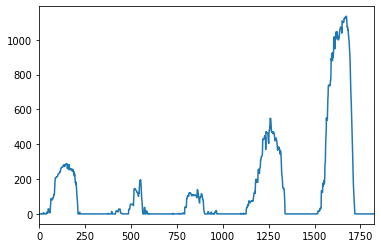

In [123]:
test = df_list[2]
test['SWE_UA'].plot()

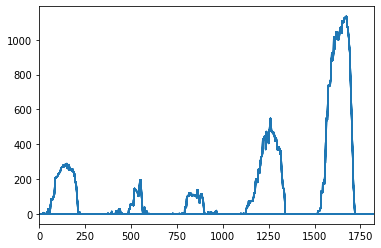

In [117]:
df_ua['SWE_UA'].plot()

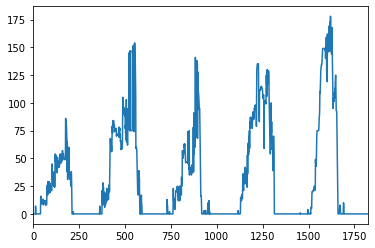

In [113]:
df['SWE_UA'].plot()

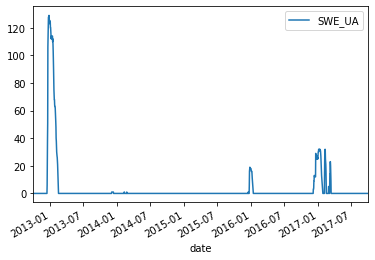

In [46]:
df_ua.plot(x = 'date', y = 'SWE_UA')

In [246]:
us_grid = pd.read_csv('/Users/carina/Desktop/code/Processing_tools/us_grid.csv')

In [196]:
us_grid

,Unnamed: 0,date,SWE_UA,Depth_UA,latitude,longitude,label
0,0,2012-10-01,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba
1,1,2012-10-02,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba
2,2,2012-10-03,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba
3,3,2012-10-04,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba
4,4,2012-10-05,0.0,0.0,37.077776,-118.723445,0003f387-71c4-48f6-b2b0-d853bd4f0aba
...,...,...,...,...,...,...,...
33105375,1821,2017-09-26,0.0,0.0,47.523549,-123.798926,fffb4d40-5947-4922-9f05-5d8b5a243d84
33105376,1822,2017-09-27,0.0,0.0,47.523549,-123.798926,fffb4d40-5947-4922-9f05-5d8b5a243d84
33105377,1823,2017-09-28,0.0,0.0,47.523549,-123.798926,fffb4d40-5947-4922-9f05-5d8b5a243d84
33105378,1824,2017-09-29,0.0,0.0,47.523549,-123.798926,fffb4d40-5947-4922-9f05-5d8b5a243d84


In [247]:
us_grid.set_index("label", inplace=True)
us_grid.head()

,Unnamed: 0,date,SWE_UA,Depth_UA,latitude,longitude
label,,,,,,
0003f387-71c4-48f6-b2b0-d853bd4f0aba,0,2012-10-01,0.0,0.0,37.077776,-118.723445
0003f387-71c4-48f6-b2b0-d853bd4f0aba,1,2012-10-02,0.0,0.0,37.077776,-118.723445
0003f387-71c4-48f6-b2b0-d853bd4f0aba,2,2012-10-03,0.0,0.0,37.077776,-118.723445
0003f387-71c4-48f6-b2b0-d853bd4f0aba,3,2012-10-04,0.0,0.0,37.077776,-118.723445
0003f387-71c4-48f6-b2b0-d853bd4f0aba,4,2012-10-05,0.0,0.0,37.077776,-118.723445


In [256]:
test = us_grid.loc['76b55900-eb3d-4d25-a538-f74302ffe72d']

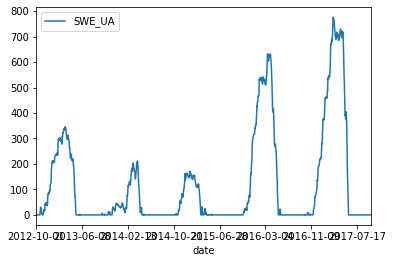

In [257]:
test.plot(x = 'date', y = 'SWE_UA')

In [250]:
us_grid_station = pd.read_csv('/Users/carina/Downloads/station_cell_mapping.txt')

In [261]:
us_grid_station.set_index("cell_id", inplace=True)
us_grid_station.head()

,Unnamed: 0,station_id,lat,lon
cell_id,,,,
76b55900-eb3d-4d25-a538-f74302ffe72d,0,CDEC:ADM,41.993149,-120.178716
f191fe19-0e81-4bc9-9980-29738a05a49b,1,CDEC:AGP,37.727154,-119.136670
f6106ef5-e6fd-423b-9034-59bce18319da,2,CDEC:ALP,38.918145,-120.205665
0a54de9c-d804-4681-9f7f-9f770a0f6d2e,3,CDEC:BCB,37.070608,-118.768361
4f383fb2-6cc7-48a8-9bdb-9c5d150e6eae,4,CDEC:BCH,36.364939,-118.292253


In [262]:
test_station = us_grid_station.loc['76b55900-eb3d-4d25-a538-f74302ffe72d']

In [263]:
test_station.plot(x = 'date', y = 'SWE_UA')

KeyError: 'date'